In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import pylab as plt
from scipy.signal import convolve2d, correlate2d
import vision.sim_tools.kernels.center_surround as csgen
import vision.sim_tools.kernels.gabor as gabgen
from vision.spike_tools.vis import my_imshow

def mse(mat0, mat1):
    return ((mat0 - mat1)**2).mean()


(-0.13419575407364331, 0.7152301634276107)
7.21644966006e-16
1.0


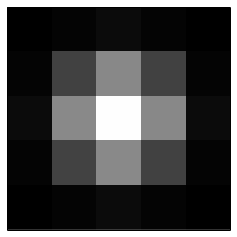

In [3]:
kernel_w = 5
std_dev = 0.8
sd_mult = 6.7
csk = csgen.center_surround_kernel(kernel_w, std_dev, sd_mult)
print(csk.min(), csk.max())
print(csk.sum())
print((csk**2).sum())
plt.figure()
ax = plt.subplot(1,1,1)
my_imshow(ax, csk)#, vmin=-1, vmax=1)
plt.show()

In [4]:
cs_corr0 = convolve2d(csk, csk, mode='same', boundary='wrap')
print(cs_corr0)
cs_corr1 = correlate2d(csk, csk, mode='same')
print(cs_corr1)

[[-0.38164576 -0.23244889 -0.11982284 -0.23244889 -0.38164576]
 [-0.23244889  0.19680152  0.51956486  0.19680152 -0.23244889]
 [-0.11982284  0.51956486  1.          0.51956486 -0.11982284]
 [-0.23244889  0.19680152  0.51956486  0.19680152 -0.23244889]
 [-0.38164576 -0.23244889 -0.11982284 -0.23244889 -0.38164576]]
[[-0.29134316 -0.25440563 -0.11395082 -0.25440563 -0.29134316]
 [-0.25440563  0.06701372  0.44505146  0.06701372 -0.25440563]
 [-0.11395082  0.44505146  1.          0.44505146 -0.11395082]
 [-0.25440563  0.06701372  0.44505146  0.06701372 -0.25440563]
 [-0.29134316 -0.25440563 -0.11395082 -0.25440563 -0.29134316]]


6.12323399574e-17
[0.0, 45.0, 90.0, 135.0]
(0.3017092591873185, -0.3017092591873185)
5.55111512313e-17
1.0
(0.40730711826614086, -0.40730711826614086)
-2.22044604925e-16
1.0
(0.29154768364797307, -0.29154768364797307)
3.92239131234e-18
1.0
(0.29154768364797307, -0.29154768364797307)
5.55111512313e-17
1.0


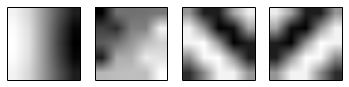

In [24]:
# freq = 4.
print( np.cos(90*(np.pi/180.)) )
freq = 2.#5.
pi_divs = 4
# pi_frac = 45.*np.pi/180.
pi_frac = np.pi/float(pi_divs)
gk = gabgen.multi_gabor(kernel_w, [i*pi_frac for i in range(pi_divs)],
                        3., freq)
print([i*pi_frac*180./np.pi for i in range(pi_divs)])
cols = 4
rows = len(gk)//cols + 1
plt.figure()
div = 0
for k in gk.keys():
    print(gk[k].max(), gk[k].min())
    print(gk[k].sum())
    print((gk[k]**2).sum())
    div += 1
    ax = plt.subplot(rows, cols, div)
#     my_imshow(ax, gk[k], vmin=-1, vmax=1)#, interpolation='bilinear')
    my_imshow(ax, gk[k], interpolation='bilinear')
plt.show()

In [6]:
cols = 4
rows = len(gk)//cols + 1
div = 0
plt.figure()
for k in gk:
    kc = convolve2d(k, k, mode='same')
    print(kc)
    div += 1
    ax = plt.subplot(rows, cols, div)
    my_imshow(ax, kc, vmin=-1, vmax=1)#, interpolation='bilinear')
plt.show()

ValueError: object of too small depth for desired array